In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

plt.show()


In [ ]:
df = pd.read_excel("Online Retail.xlsx")


In [ ]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df = df.dropna(subset=['CustomerID'])


In [ ]:
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [ ]:
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)


In [ ]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',                                      # Frequency
    'TotalPrice': 'sum'                                        # Monetary
})


In [ ]:
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [ ]:
rfm.describe()


,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000
mean,92.518322,91.708689,2053.793018
std,100.009747,228.792852,8988.248381
min,1.000000,1.000000,0.000000
25%,18.000000,17.000000,307.245000
50%,51.000000,41.000000,674.450000
75%,142.000000,100.000000,1661.640000
max,374.000000,7847.000000,280206.020000


In [ ]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)


In [ ]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)


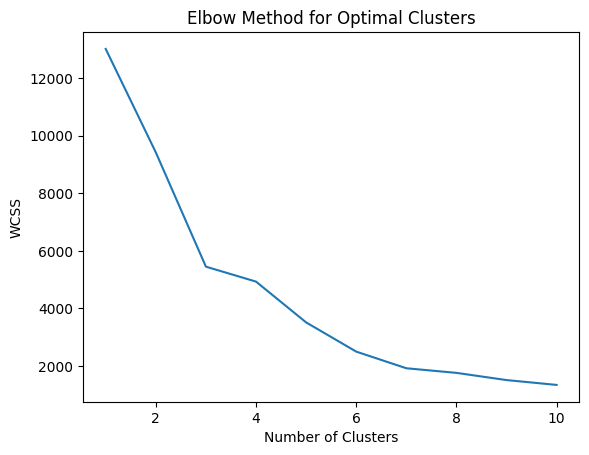

In [ ]:
plt.plot(range(1,11), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal Clusters")
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


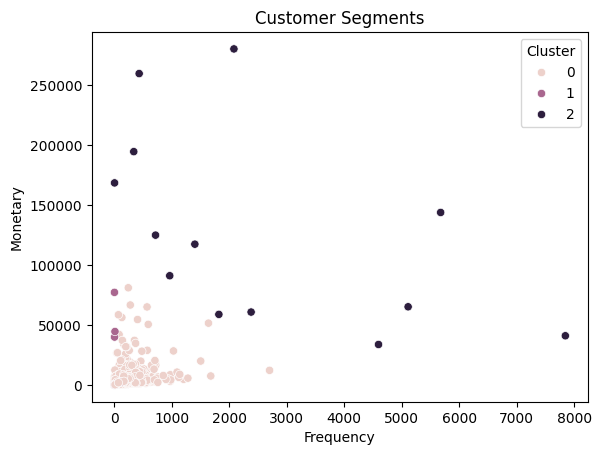

In [ ]:
plt.figure()
sns.scatterplot(
    x=rfm['Frequency'],
    y=rfm['Monetary'],
    hue=rfm['Cluster']
)
plt.title("Customer Segments")
plt.show()


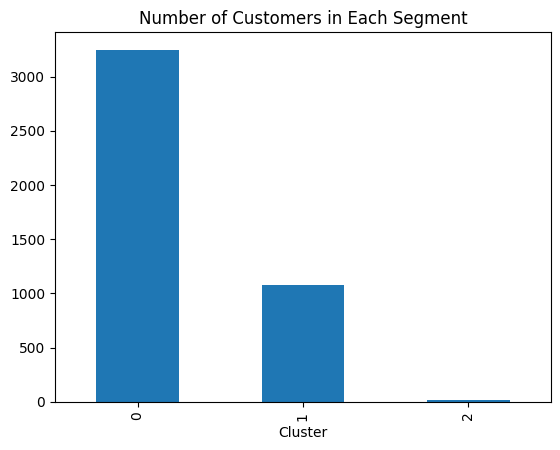

In [ ]:
rfm['Cluster'].value_counts().plot(kind='bar')
plt.title("Number of Customers in Each Segment")
plt.show()


In [ ]:
rfm.groupby('Cluster').mean()


,Recency,Frequency,Monetary
Cluster,,,
0,41.368762,103.066235,2028.208836
1,247.308333,27.789815,637.318510
2,4.692308,2566.000000,126118.310000


Insights:

1. A small group of customers contributes most revenue

2. Some customers purchase frequently but spend less

3. Inactive customers show high recency values

Recommendations:

1. Reward loyal customers with loyalty programs

2. Offer discounts to low-frequency customers

3. Personalized marketing for each customer segment